Importing libraries

In [1]:
import pathlib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, tree, ensemble
from sklearn.utils import shuffle
import tensorflow as tf
from google.colab import files

Checking if device is GPU

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

Uploading Kaggle token

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahmuedalardawi","key":"dd071d7a5b7237c6d363d0cd48ba2095"}'}

Importing Kaggle dataset

In [4]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Downloading the Arabic Handwritten Characters Dataset

In [5]:
! kaggle datasets download -d mloey1/ahcd1

 21% 5.00M/24.0M [00:00<00:00, 37.5MB/s]
100% 24.0M/24.0M [00:00<00:00, 110MB/s] 


Unzipping the dataset to folder Datasets

In [6]:
!unzip ahcd1.zip -d Datasets

Streaming output truncated to the last 5000 lines.
  inflating: Datasets/train images 13440x32x32/train/id_5500_label_16.png  
  inflating: Datasets/train images 13440x32x32/train/id_5501_label_16.png  
  inflating: Datasets/train images 13440x32x32/train/id_5502_label_16.png  
  inflating: Datasets/train images 13440x32x32/train/id_5503_label_16.png  
  inflating: Datasets/train images 13440x32x32/train/id_5504_label_16.png  
  inflating: Datasets/train images 13440x32x32/train/id_5505_label_17.png  
  inflating: Datasets/train images 13440x32x32/train/id_5506_label_17.png  
  inflating: Datasets/train images 13440x32x32/train/id_5507_label_17.png  
  inflating: Datasets/train images 13440x32x32/train/id_5508_label_17.png  
  inflating: Datasets/train images 13440x32x32/train/id_5509_label_17.png  
  inflating: Datasets/train images 13440x32x32/train/id_550_label_13.png  
  inflating: Datasets/train images 13440x32x32/train/id_5510_label_17.png  
  inflating: Datasets/train images 134

Loading the data

In [7]:
dir = pathlib.Path("/content/Datasets/Arabic Handwritten Characters Dataset CSV")

# training data features
train_data = pd.read_csv(dir / "csvTrainImages 13440x1024.csv", header=None)

# training data target
train_target = pd.read_csv(dir / "csvTrainLabel 13440x1.csv", header=None)

# testing data features
test_data = pd.read_csv(dir / "csvTestImages 3360x1024.csv", header=None)

# testing data target
test_target = pd.read_csv(dir / "csvTestLabel 3360x1.csv", header=None)

showing the datasets

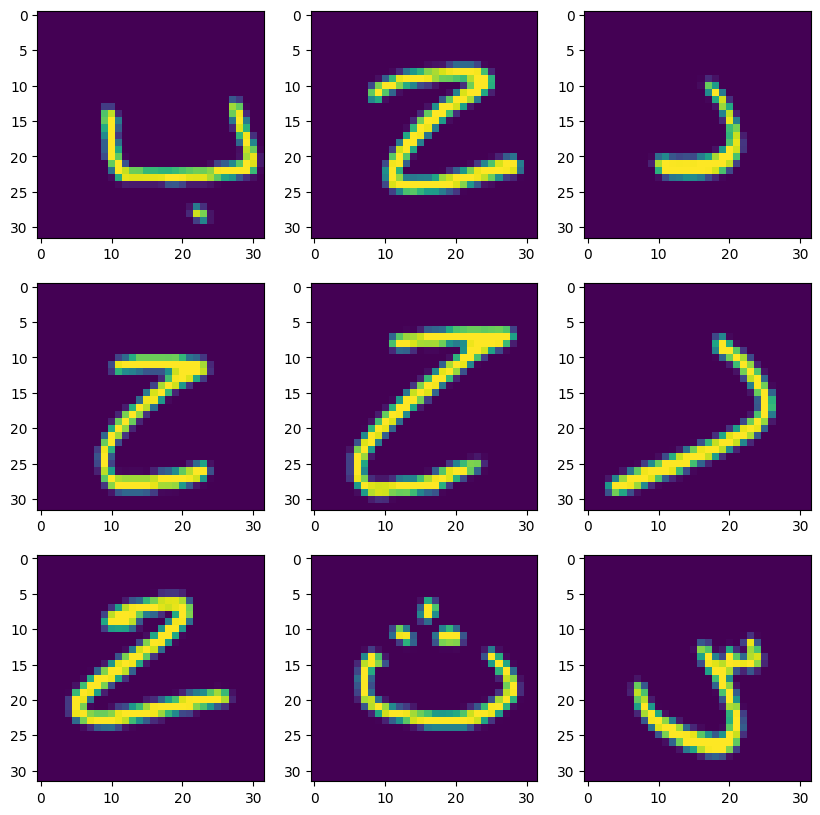

In [8]:
shuff = shuffle(train_data[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
  axes[i].imshow(shuff.values[i].reshape(32,32).transpose(1,0))
plt.show()

In [9]:
print(train_data)
print(train_target)

       0     1     2     3     4     5     6     7     8     9     ...  1014  \
0         0     0     0     0     0     0     0     0     0     0  ...     0   
1         0     0     0     0     0     0     0     0     0     0  ...     0   
2         0     0     0     0     0     0     0     0     0     0  ...     0   
3         0     0     0     0     0     0     0     0     0     0  ...     0   
4         0     0     0     0     0     0     0     0     0     0  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
13435     0     0     0     0     0     0     0     0     0     0  ...     0   
13436     0     0     0     0     0     0     0     0     0     0  ...     0   
13437     0     0     0     0     0     0     0     0     0     0  ...     0   
13438     0     0     0     0     0     0     0     0     0     0  ...     0   
13439     0     0     0     0     0     0     0     0     0     0  ...     0   

       1015  1016  1017  1018  1019  10

In [10]:
print(test_data)
print(test_target)

      0     1     2     3     4     5     6     7     8     9     ...  1014  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
3355     0     0     0     0     0     0     0     0     0     0  ...     0   
3356     0     0     0     0     0     0     0     0     0     0  ...     0   
3357     0     0     0     0     0     0     0     0     0     0  ...     0   
3358     0     0     0     0     0     0     0     0     0     0  ...     0   
3359     0     0     0     0     0     0     0     0     0     0  ...     0   

      1015  1016  1017  1018  1019  1020  1021  102

# ML(Supervised): Decision Tree Classifier

Creating a decision tree classifier

In [11]:
dtc = tree.DecisionTreeClassifier().fit(train_data, train_target)

Making predictions

In [12]:
dtc_predections = dtc.predict(test_data)

Finding model accuarcy

In [13]:
accuracy = metrics.accuracy_score(test_target, dtc_predections)

print(accuracy)

0.37410714285714286


Generating classification report

In [14]:
dtc_report = metrics.classification_report(test_target, dtc_predections)
print(dtc_report)

              precision    recall  f1-score   support

           1       0.72      0.77      0.74       120
           2       0.48      0.48      0.48       120
           3       0.28      0.28      0.28       120
           4       0.29      0.25      0.27       120
           5       0.35      0.36      0.35       120
           6       0.43      0.44      0.44       120
           7       0.33      0.32      0.32       120
           8       0.33      0.44      0.38       120
           9       0.28      0.33      0.31       120
          10       0.52      0.58      0.55       120
          11       0.39      0.38      0.38       120
          12       0.28      0.32      0.30       120
          13       0.37      0.31      0.34       120
          14       0.32      0.35      0.33       120
          15       0.36      0.26      0.30       120
          16       0.36      0.36      0.36       120
          17       0.29      0.25      0.27       120
          18       0.32    

Implementation

Predection = 24


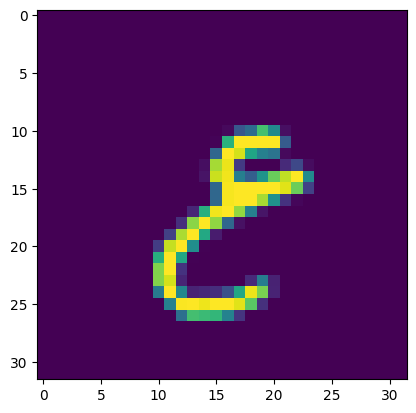

In [15]:
img = random.randint(0, len(dtc_predections) - 1)
print("Predection =", dtc_predections[img])
plt.imshow(test_data.values[img].reshape(32,32).transpose(1,0))

# ML(Supervised): Random Forest Classifier

Creating a random forest classifier

In [16]:
rfc = ensemble.RandomForestClassifier().fit(train_data, train_target)

<ipython-input-16-d5ed9d04c9b6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = ensemble.RandomForestClassifier().fit(train_data, train_target)


Making predictions

In [17]:
rfc_predections = rfc.predict(test_data)

Finding model accuarcy

In [18]:
accuracy = metrics.accuracy_score(test_target, rfc_predections)

print(accuracy)

0.6735119047619048


Generating classification report

In [19]:
rfc_report = metrics.classification_report(test_target, rfc_predections)
print(rfc_report)

              precision    recall  f1-score   support

           1       0.80      0.96      0.87       120
           2       0.67      0.88      0.76       120
           3       0.56      0.56      0.56       120
           4       0.58      0.57      0.57       120
           5       0.71      0.66      0.68       120
           6       0.65      0.72      0.68       120
           7       0.67      0.53      0.59       120
           8       0.55      0.79      0.65       120
           9       0.54      0.55      0.55       120
          10       0.64      0.85      0.73       120
          11       0.63      0.61      0.62       120
          12       0.68      0.75      0.71       120
          13       0.83      0.67      0.74       120
          14       0.59      0.70      0.64       120
          15       0.66      0.47      0.55       120
          16       0.68      0.72      0.70       120
          17       0.71      0.59      0.65       120
          18       0.62    

Implementation

Predection = 17


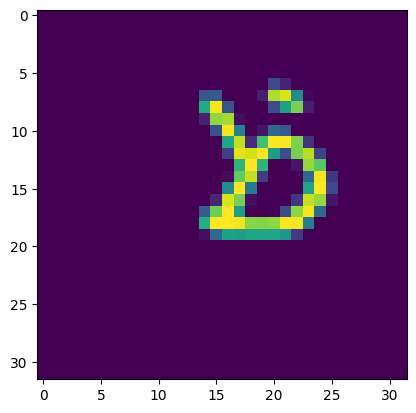

In [20]:
img = random.randint(0, len(rfc_predections) - 1)
print("Predection =", rfc_predections[img])
plt.imshow(test_data.values[img].reshape(32,32).transpose(1,0))

# DL: Neural Network (NN)

Normalizing the data

In [21]:
train_data = tf.keras.utils.normalize(train_data, axis=1)
test_data = tf.keras.utils.normalize(test_data, axis=1)

Neural Network model

In [152]:
mode_nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(29, activation='softmax')
])

compiling the model

In [153]:
mode_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

Training the model

In [154]:
mode_nn.fit(train_data, train_target, validation_split=0.3, epochs=10)

Epoch 1/10
294/294 [==============================] - 3s 6ms/step - loss: 2.2333 - accuracy: 0.3149 - val_loss: 1.7610 - val_accuracy: 0.4157
Epoch 2/10
294/294 [==============================] - 1s 5ms/step - loss: 1.2432 - accuracy: 0.5784 - val_loss: 1.3027 - val_accuracy: 0.5707
Epoch 3/10
294/294 [==============================] - 1s 5ms/step - loss: 0.8145 - accuracy: 0.7212 - val_loss: 1.1928 - val_accuracy: 0.6047
Epoch 4/10
294/294 [==============================] - 1s 4ms/step - loss: 0.5744 - accuracy: 0.8011 - val_loss: 1.0808 - val_accuracy: 0.6473
Epoch 5/10
294/294 [==============================] - 1s 4ms/step - loss: 0.4116 - accuracy: 0.8603 - val_loss: 1.1054 - val_accuracy: 0.6486
Epoch 6/10
294/294 [==============================] - 2s 6ms/step - loss: 0.3060 - accuracy: 0.8968 - val_loss: 1.1355 - val_accuracy: 0.6567
Epoch 7/10
294/294 [==============================] - 1s 4ms/step - loss: 0.2182 - accuracy: 0.9296 - val_loss: 1.1809 - val_accuracy: 0.6632
Epoch 

Finding loss and accuracy

In [155]:
loss, accuracy = mode_nn.evaluate(test_data, test_target)

print("Accuracy =", accuracy)
print("Loss =", loss)

105/105 [==============================] - 0s 2ms/step - loss: 1.0259 - accuracy: 0.7390
Accuracy = 0.7389881014823914
Loss = 1.0258711576461792


Making predictions

In [26]:
ann_predections = mode_nn.predict(test_data)

105/105 [==============================] - 0s 2ms/step


Implementation

Predection = 5


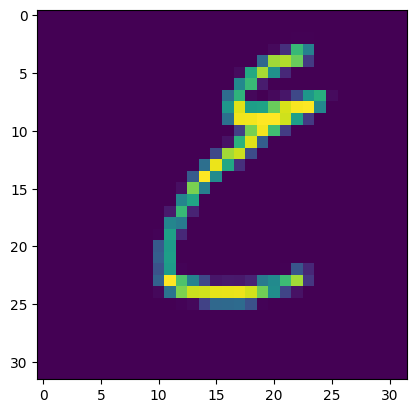

In [27]:
img = random.randint(0, len(ann_predections) - 1)
print("Predection =", np.argmax(ann_predections[img]))
plt.imshow(test_data.values[img].reshape(32,32).transpose(1,0))

# DL: Convolutional Neural Networks (CNN)

Reshaping the data to a numpy array

In [28]:
train_data_cnn = np.reshape(train_data.values, (train_data.shape[0], 32, 32))
print(train_data_cnn.shape)

test_data_cnn = np.reshape(test_data.values, (test_data.shape[0], 32, 32))
print(test_data_cnn.shape)

(13440, 32, 32)
(3360, 32, 32)


Reshaping the data to a convolutional shape

In [29]:
train_data_cnn = train_data_cnn.reshape(train_data_cnn.shape[0], train_data_cnn.shape[1], train_data_cnn.shape[2], 1)
print(train_data_cnn.shape)

test_data_cnn = test_data_cnn.reshape(test_data_cnn.shape[0], test_data_cnn.shape[1], test_data_cnn.shape[2], 1)
print(test_data_cnn.shape)

(13440, 32, 32, 1)
(3360, 32, 32, 1)


Convolutional Neural Network model

In [148]:
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1024,activation ="selu"),
    tf.keras.layers.Dense(512,activation ="selu"),
    tf.keras.layers.Dense(29,activation ="softmax")
])

compiling the model

In [149]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

Training the model

In [150]:
model_cnn.fit(train_data_cnn, train_target, validation_split=0.3, epochs=10)

Epoch 1/10
294/294 [==============================] - 4s 6ms/step - loss: 1.6415 - accuracy: 0.4425 - val_loss: 0.7832 - val_accuracy: 0.7066
Epoch 2/10
294/294 [==============================] - 2s 6ms/step - loss: 0.6234 - accuracy: 0.7785 - val_loss: 0.5453 - val_accuracy: 0.8160
Epoch 3/10
294/294 [==============================] - 2s 8ms/step - loss: 0.3921 - accuracy: 0.8615 - val_loss: 0.4258 - val_accuracy: 0.8695
Epoch 4/10
294/294 [==============================] - 2s 7ms/step - loss: 0.2579 - accuracy: 0.9106 - val_loss: 0.3838 - val_accuracy: 0.8837
Epoch 5/10
294/294 [==============================] - 2s 6ms/step - loss: 0.1718 - accuracy: 0.9411 - val_loss: 0.4234 - val_accuracy: 0.8787
Epoch 6/10
294/294 [==============================] - 2s 6ms/step - loss: 0.1619 - accuracy: 0.9439 - val_loss: 0.3894 - val_accuracy: 0.9008
Epoch 7/10
294/294 [==============================] - 2s 6ms/step - loss: 0.1284 - accuracy: 0.9574 - val_loss: 0.4659 - val_accuracy: 0.8941
Epoch 

Finding loss and accuracy

In [151]:
loss, accuracy = model_cnn.evaluate(test_data_cnn, test_target)

print("Accuracy =", accuracy)
print("Loss =", loss)

105/105 [==============================] - 0s 3ms/step - loss: 0.3687 - accuracy: 0.9176
Accuracy = 0.9175595045089722
Loss = 0.3686663806438446


Making predections

In [34]:
cnn_predections = model_cnn.predict(test_data_cnn)

105/105 [==============================] - 0s 2ms/step


Implementation

Predection = 3


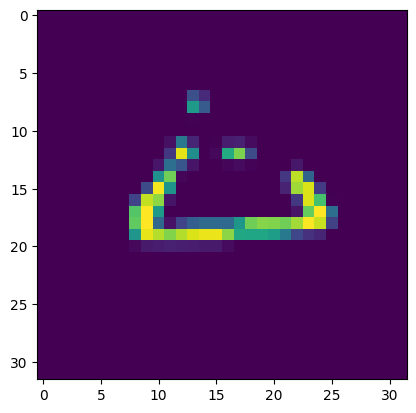

In [35]:
img = random.randint(0, len(cnn_predections) - 1)
print("Predection =", np.argmax(cnn_predections[img]))
plt.imshow(test_data.values[img].reshape(32,32).transpose(1,0))